In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pylab as plt
# !pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

## 1) Create cross validation grid search classification tree for Corolla price.

In [2]:
toyota = pd.read_csv("ToyotaCorolla.csv")
toyota.Model = toyota.Model.astype('category')
toyota.Fuel_Type = toyota.Fuel_Type.astype('category')
toyota.Color = toyota.Color.astype('category')

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


### a. Create a binary variable for above average price and below average price.

In [4]:
avg = toyota['Price'].mean()
toyota['Above_avg'] = np.where(toyota['Price']>avg, 1, 0)

### b. Search for the best optimization options.  Only include the appropriate variables for modeling.

In [5]:
toyota_data = toyota.copy()#.drop(columns = 'Model')
toyota_data = pd.get_dummies(toyota_data,drop_first=True)
train_df, valid_df = train_test_split(toyota_data, test_size=0.4, random_state=1)

In [6]:
train_df

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
1238,1245,7750,75,6,1998,82256,110,1,0,1600,...,1,0,1,0,0,0,0,0,0,0
1085,1091,7950,79,2,1998,131500,72,0,0,2000,...,0,0,1,0,0,0,0,0,0,0
680,684,7950,61,8,1999,102106,110,0,0,1600,...,1,0,1,0,0,0,0,0,0,0
593,597,10950,50,7,2000,22648,97,1,0,1400,...,1,0,0,0,1,0,0,0,0,0
647,651,6950,68,1,1999,117000,72,0,0,2000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,719,8490,62,7,1999,90000,110,0,0,1600,...,1,0,0,0,0,1,0,0,0,0
905,909,9950,65,4,1999,59000,110,0,0,1600,...,1,0,0,0,1,0,0,0,0,0
1096,1102,7900,75,6,1998,125400,110,0,0,1600,...,1,0,0,0,0,0,0,0,1,0
235,237,11650,38,7,2001,60829,110,1,0,1600,...,1,0,1,0,0,0,0,0,0,0


In [7]:
X_train = train_df.drop(columns=['Id', 'Price', 'Above_avg'])
y_train = train_df['Above_avg']
X_valid = valid_df.drop(columns=['Id', 'Price','Above_avg'])
y_valid = valid_df['Above_avg']

In [8]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(X_train, y_train)
classificationSummary(y_valid,fullClassTree.predict(X_valid))

Confusion Matrix (Accuracy 0.8678)

       Prediction
Actual   0   1
     0 321  38
     1  38 178


In [9]:
param_dict = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': range(1,10),
#     'min_samples_split': range(1,10),
#     'min_samples_leaf': range(1,5)
}
fullClassTree = DecisionTreeClassifier(random_state=1)
grid = GridSearchCV(estimator=fullClassTree,param_grid = param_dict,cv=5,verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)},
             verbose=True)

### c. Determine the best estimators

In [10]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [11]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=1)

### d. Plot the tree

In [12]:
bestClassTree = DecisionTreeClassifier(max_depth=3, random_state=1)
bestClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

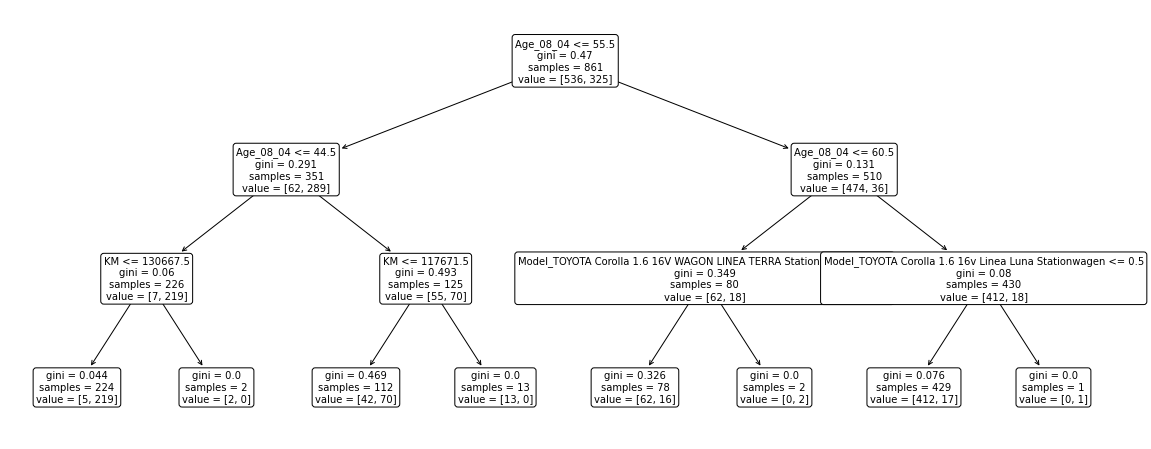

In [13]:
plt.figure(figsize=(20, 8))
plot_tree(bestClassTree, 
          rounded=True,                 
          feature_names=X_train.columns,      
          fontsize=10)
plt.show()

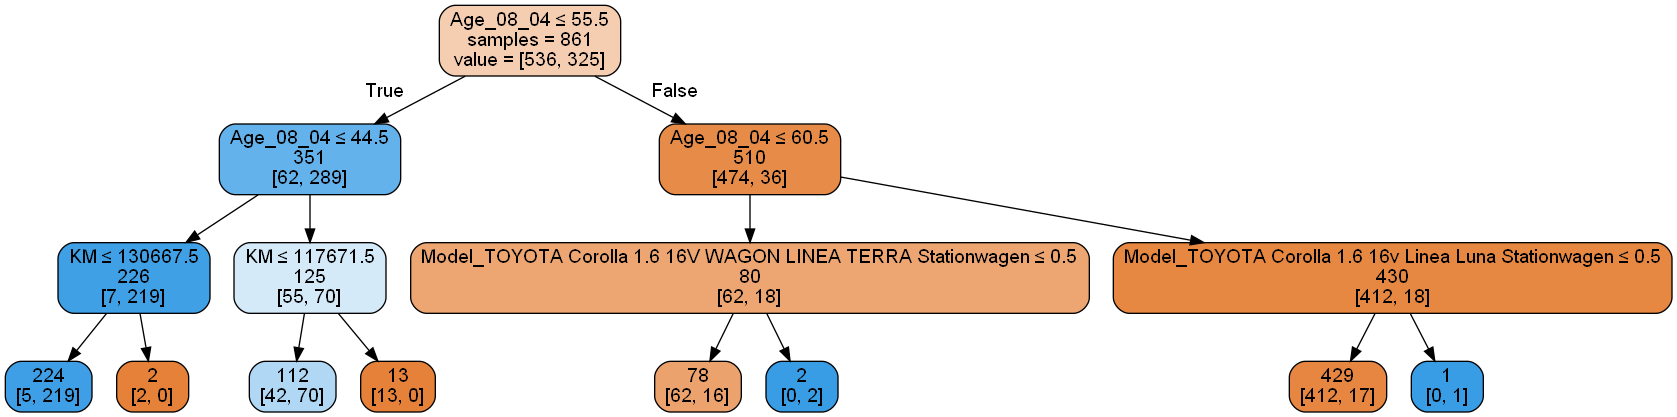

In [14]:
plotDecisionTree(bestClassTree, feature_names=X_train.columns)

### e. Calculate the accuracy

In [15]:
#in practice never classify accuracy on train:
# classificationSummary(y_train,bestClassTree.predict(X_train))
#in practice always classify accuracy on validation (or test):
classificationSummary(y_valid,bestClassTree.predict(X_valid))

Confusion Matrix (Accuracy 0.8887)

       Prediction
Actual   0   1
     0 324  35
     1  29 187


## 2) Create a model to predict the prices of used cars using below 2 methods:

In [16]:
toyota_data = toyota[["Age_08_04", "KM", "Fuel_Type", "HP", "Automatic", "Doors", "Quarterly_Tax", "Mfr_Guarantee", "Guarantee_Period",  "Airco", "CD_Player", "Powered_Windows", "Sport_Model", "Tow_Bar" ,"Price"]].copy()
toyota_data = pd.get_dummies(toyota_data,drop_first=True)
train_df, valid_df = train_test_split(toyota_data, test_size=0.4, random_state=1)
X_train = train_df.drop(columns=['Price'])
y_train = train_df['Price']
X_valid = valid_df.drop(columns=['Price'])
y_valid = valid_df['Price']

### Regression (full, forward, backward)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_valid,y_valid)

0.8536388545662728

### Regression trees (cv=5 gridsearch)

In [18]:
param_dict = {
    'criterion': ['mse','mae'], 
    'max_depth': range(1,10),
#     'min_samples_split': range(1,10),
#     'min_samples_leaf': range(1,5)
}
dtm = DecisionTreeRegressor(random_state=1)
grid = GridSearchCV(estimator=dtm,param_grid = param_dict,cv=5,verbose=True)
grid.fit(X_train, y_train)
print("R-Squared::{}".format(grid.best_score_))
print("Best Hyperparameters::\n{}".format(grid.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
R-Squared::0.8660124189434061
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6}


In [19]:
best_dtm = DecisionTreeRegressor(max_depth=6,random_state=1)
best_dtm.fit(X_train, y_train)
best_dtm.score(X_valid,y_valid)

0.8837008604025591

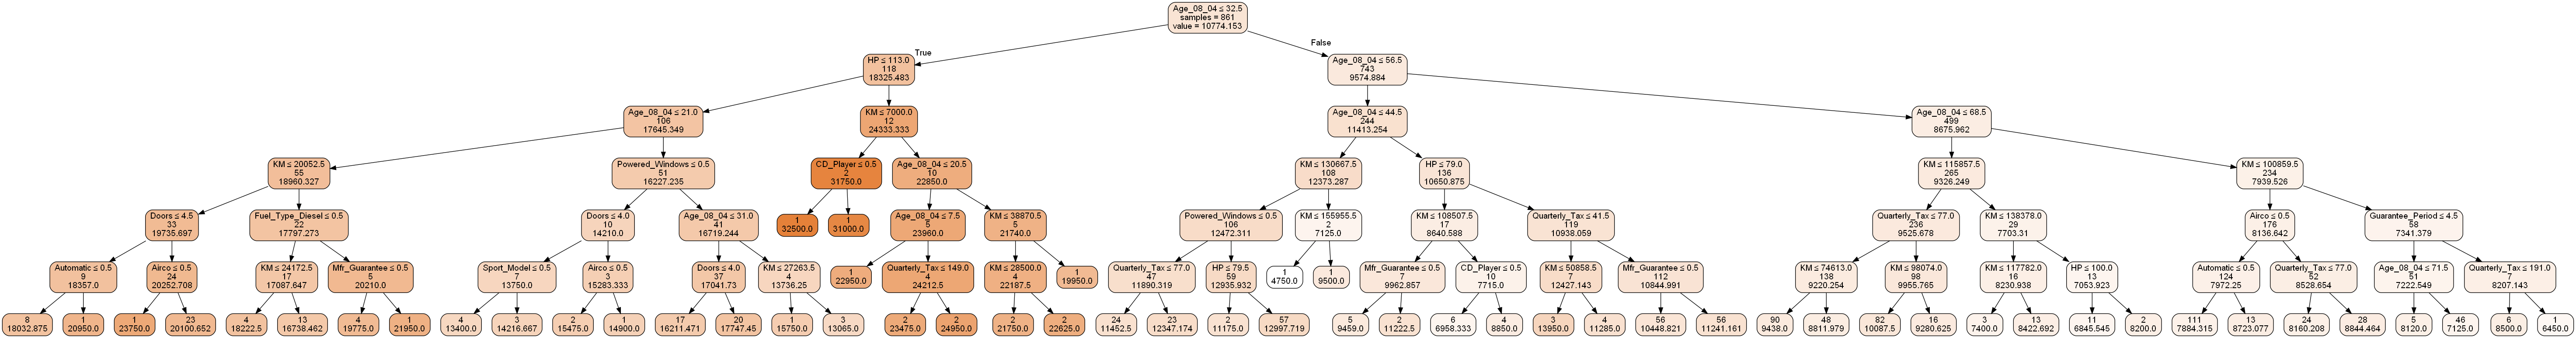

In [20]:
plotDecisionTree(best_dtm, feature_names=X_train.columns)

Ans: the decision tree regressor (accuracy = 0.8837008604025591) provides better predictions than the multiple linear regression (accuracy = 0.8536388545662728)